In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from hatesonar import Sonar 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('hate_speech_input.pkl')

In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
df.shape

(48617, 8)

In [5]:
df.head()

,tweet_text,tweet_text_p,negative,neutral,positive,compound,sentiment,lemmatized
0,Islam is a religion full of blessings and good...,"Islam is a full of blessings and good deeds, ...",0.000,0.564,0.436,0.8910,1,"[full, blessing, good, deed, also, respect, li..."
1,@ wagner_claire Religion and pity are antonyms...,"and pity are antonyms. One is disaster, othe...",0.247,0.605,0.148,-0.2023,-1,"[disaster, humanity, live, pity]"
2,if the only reason people are on twitter is to...,if the only reason people are on twitter is to...,0.130,0.870,0.000,-0.3400,-1,"[reason, people, argue, count]"
3,Religion is needed to provide a moral compass ...,is needed to provide a moral compass to those...,0.173,0.827,0.000,-0.3182,-1,"[need, provide, moral, compass, lack, empathy]"
4,plus my religion has never been 'holier' than ...,plus my has never been 'holier' than regular ...,0.000,0.811,0.189,0.4939,1,"[never, holier, regular, life, regular, life, ..."


In [6]:
df.describe()

,negative,neutral,positive,compound,sentiment
count,48617.000000,48617.000000,48617.000000,48617.000000,48617.000000
mean,0.113250,0.769190,0.117558,-0.000854,0.011025
std,0.124836,0.151591,0.121044,0.536449,0.912789
min,0.000000,0.164000,0.000000,-0.990200,-1.000000
25%,0.000000,0.667000,0.000000,-0.459900,-1.000000
50%,0.088000,0.773000,0.099000,0.000000,0.000000
75%,0.188000,0.875000,0.189000,0.451400,1.000000
max,0.792000,1.000000,0.805000,0.993200,1.000000


In [7]:
type(df['tweet_text'][1])

str

In [8]:
import sklearn.linear_model.logistic
# Create an object of Sonar Hate Speech Detection
sonar = Sonar()

In [9]:
Class = []
hate = []
offensive = []
neither = []

In [10]:
def hate_speech_classifier(df, Class, hate, offensive, neither):
    for i in df['tweet_text']:
        sonar_dict = sonar.ping(text=i)
        Class.append(list(sonar_dict.values())[1])
        hate.append(list(list(sonar_dict.values())[2][0].values())[1])
        offensive.append(list(list(sonar_dict.values())[2][1].values())[1])
        neither.append(list(list(sonar_dict.values())[2][2].values())[1])

In [11]:
# Function calling 
hate_speech_classifier(df, Class, hate, offensive, neither)

In [12]:
# Prepare columns to add the scores later
df["Class"] = Class
df["hate"] = hate
df["offensive"] = offensive
df["neither"] = neither

In [13]:
df.Class.value_counts()

neither               44760
offensive_language     3609
hate_speech             248
Name: Class, dtype: int64

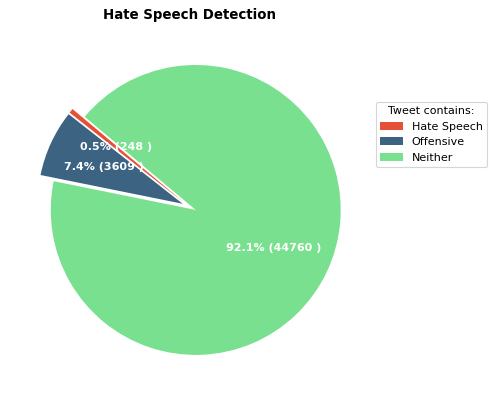

In [14]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df.Class.value_counts()[-1], df.Class.value_counts()[1], df.Class.value_counts()[0]]
categories = ['Hate Speech', 'Offensive', 'Neither']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Tweet contains:", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Hate Speech Detection", fontsize=12, fontweight="bold")
plt.show()

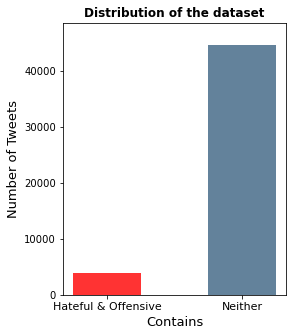

In [15]:
labels = ['Hateful & Offensive', 'Neither']
freq = [df.Class.value_counts()[-1] + df.Class.value_counts()[1], df.Class.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(4,5))
plt.bar(index, freq, alpha=0.8, width=0.5, color=['red','#3c6382','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Distribution of the dataset", fontsize=12, fontweight="bold")
plt.ylim(0, len(df['tweet_text']))
plt.show()

In [16]:
labels = ['Hate Speech', 'Offensive Language']
freq1 = [df.Class.value_counts()[-1], df.Class.value_counts()[1]]
index1 = np.arange(len(freq1))

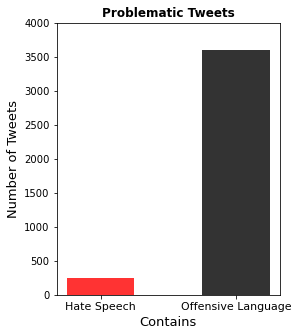

In [17]:
plt.figure(figsize=(4,5))
plt.bar(index1, freq1, alpha=0.8, width=0.5, color=['red','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Problematic Tweets", fontsize=12, fontweight="bold")
plt.ylim(0, 4000)
plt.show()

In [18]:
df_hate = df[df['Class']=='hate_speech']
df_offensive = df[df['Class']=='offensive_language']
df_neither = df[df['Class']=='neither']

In [19]:
df_neither.sentiment.value_counts()

 1    19349
-1    17709
 0     7702
Name: sentiment, dtype: int64

In [20]:
df_offensive.sentiment.value_counts()

-1    2124
 1    1109
 0     376
Name: sentiment, dtype: int64

In [21]:
7707/(19336+17683+7707)

0.17231587890712338

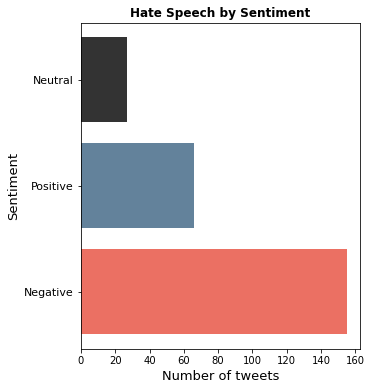

In [22]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_hate.sentiment.value_counts()[-1], df_hate.sentiment.value_counts()[1], df_hate.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 1: Sentiment of Tweets classified as Hateful
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Hate Speech by Sentiment", fontsize=12, fontweight="bold")
plt.show()

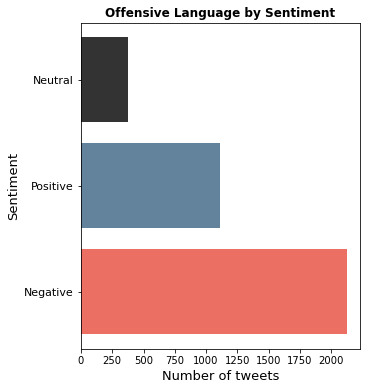

In [23]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_offensive.sentiment.value_counts()[-1], df_offensive.sentiment.value_counts()[1], df_offensive.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 2: Sentiment of Tweets classified as Offensive
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Offensive Language by Sentiment", fontsize=12, fontweight="bold")
plt.show()

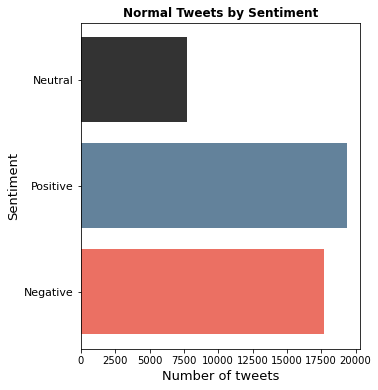

In [24]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_neither.sentiment.value_counts()[-1], df_neither.sentiment.value_counts()[1], df_neither.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 3: Sentiment of Tweets classified as Neither
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Normal Tweets by Sentiment", fontsize=12, fontweight="bold")
plt.show()

<Figure size 1440x360 with 0 Axes>

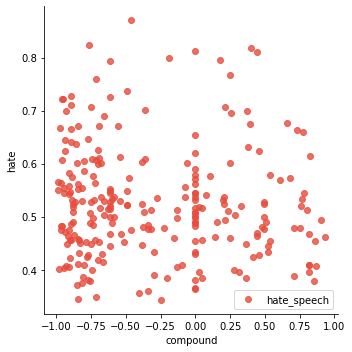

In [25]:
# Provide a dictionary to the palette argument
plt.figure(figsize=(20,5))
sns.lmplot( x="compound", y="hate", data=df_hate, fit_reg=False, hue='Class', legend=False, palette=dict(neither="black", offensive_language="#3c6382", hate_speech="#e74c3c"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

In [26]:
df_hate.sort_values('hate', inplace=True, ascending=False)

In [27]:
df_hate.reset_index(drop=True, inplace=True)

In [28]:
df_hate.head(10)

,tweet_text,tweet_text_p,negative,neutral,positive,compound,sentiment,lemmatized,Class,hate,offensive,neither
0,"@ WritersofColour ""your religion is misogynist...","""your is misogynistic"" a white feminist abus...",0.273,0.727,0.000,-0.4588,-1,"[white, feminist, abuse]",hate_speech,0.870408,0.069669,0.059924
1,What the fuck is wrong with the human race? Re...,What the fuck is wrong with the human race? &...,0.452,0.548,0.000,-0.7650,-1,"[fuck, wrong, human, race, republican]",hate_speech,0.824041,0.144219,0.031740
2,"The systematic extermination of white race,wes...","The systematic extermination of white race,wes...",0.000,0.863,0.137,0.4019,1,"[systematic, extermination, white, race, weste...",hate_speech,0.819088,0.136934,0.043978
3,What? White is a race. Judaism is a Religion s...,What? White is a race. Judaism is a so someon...,0.000,1.000,0.000,0.0000,0,"[white, race, judaism, white, jewish, common]",hate_speech,0.813112,0.143532,0.043356
4,@ yesnicksearcy @ ksoderbl # AntiWhite anti-ra...,AntiWhite anti-racism is the new . Race doe...,0.000,0.836,0.164,0.4466,1,"[anti, racism, race, exist, white, people, neg...",hate_speech,0.809880,0.166541,0.023578
5,As a white ((Aryan)) who is the exact same rac...,As a white ((Aryan)) who is the exact same rac...,0.089,0.911,0.000,-0.1901,-1,"[exact, race, white, different, culture, demand]",hate_speech,0.798556,0.130696,0.070748
6,White supremacy is an ideology. It has nothing...,White supremacy is an ideology. It has nothing...,0.000,0.870,0.130,0.1779,1,"[ideology, race, black, person, white, suprema...",hate_speech,0.795342,0.161176,0.043482
7,So why that logic then it shouldn’t be racist ...,So why that logic then it shouldn’t be racist ...,0.104,0.896,0.000,-0.6124,-1,"[logic, racist, white, people, do, white, peop...",hate_speech,0.792905,0.170698,0.036397
8,"@ BlushingGiraffe White is a race, anyone can ...","White is a race, anyone can be a Muslim.. It ...",0.156,0.596,0.248,0.2509,1,"[white, race, muslim, racist, disagree, date, ...",hate_speech,0.767149,0.061211,0.171641
9,Using one person/ persons to make a negative s...,Using one person/ persons to make a negative s...,0.214,0.677,0.109,-0.7163,-1,"[use, person, person, make, negative, statemen...",hate_speech,0.759593,0.180686,0.059721


In [29]:
df_offensive.sort_values('offensive',inplace=True, ascending=False)

In [30]:
df_offensive.reset_index(drop=True, inplace=True)

In [31]:
df_offensive.head(10)

,tweet_text,tweet_text_p,negative,neutral,positive,compound,sentiment,lemmatized,Class,hate,offensive,neither
0,"dustin speaking ""son of a bitch"" is my religion","dustin speaking ""son of a bitch"" is my",0.388,0.612,0.000,-0.5859,-1,"[speak, bitch]",offensive_language,0.010516,0.989317,0.000167
1,"Anja Nissen saying ""vegan bitches!"" in her las...","Anja Nissen saying ""vegan bitches!"" in her las...",0.000,1.000,0.000,0.0000,0,"[say, vegan, bitch, last, instagram, story]",offensive_language,0.009915,0.989315,0.000770
2,"Spencer Reid saying ""son of a bitch"" is my rel...","Spencer Reid saying ""son of a bitch"" is my",0.352,0.648,0.000,-0.5859,-1,"[say, bitch]",offensive_language,0.010632,0.988830,0.000538
3,"No more drugs for me, pussy n religion is all ...","No more drugs for me, pussy n is all I neeed",0.216,0.784,0.000,-0.2960,-1,"[drug, neeed]",offensive_language,0.011703,0.987489,0.000808
4,Honestly tho. Pussy and religion is all I need,Honestly tho. Pussy and is all I need,0.000,0.667,0.333,0.4588,1,"[honestly, pussy, need]",offensive_language,0.012881,0.986379,0.000740
5,"No more drugs for me, pussy & religion is all ...","No more drugs for me, pussy & is all I need.",0.216,0.784,0.000,-0.2960,-1,"[drug, pussy, need]",offensive_language,0.012452,0.986363,0.001185
6,no more drugs for me pussy & religion is all i...,no more drugs for me pussy & is all i need,0.216,0.784,0.000,-0.2960,-1,"[drug, pussy, need]",offensive_language,0.012452,0.986363,0.001185
7,"No more drugs for me, pussy & religion is all ...","No more drugs for me, pussy & is all I need",0.216,0.784,0.000,-0.2960,-1,"[drug, pussy, need]",offensive_language,0.012452,0.986363,0.001185
8,No more drugs for me pussy & religion is all I...,No more drugs for me pussy & is all I need,0.216,0.784,0.000,-0.2960,-1,"[drug, pussy, need]",offensive_language,0.012452,0.986363,0.001185
9,"RT @ TeamKanyeDaily: No more drugs for me, pus...","RT : No more drugs for me, pussy and is all I...",0.180,0.820,0.000,-0.2960,-1,"[drug, pussy, need]",offensive_language,0.012066,0.986205,0.001729


In [32]:
list(sonar.ping(text=df.tweet_text.iloc[189]).values())


['“Freedom of religion is a fundamental right in our democratic state, & a right that most Canadians value” @ DonPlett on # TWULaw @ TWULawSchool',
 'neither',
 [{'class_name': 'hate_speech', 'confidence': 0.053492434596591795},
  {'class_name': 'offensive_language', 'confidence': 0.32412768795897584},
  {'class_name': 'neither', 'confidence': 0.6223798774444324}]]

In [33]:
sonar.ping(text="At least I'm not a nigger")

{'text': "At least I'm not a nigger",
 'top_class': 'hate_speech',
 'classes': [{'class_name': 'hate_speech', 'confidence': 0.6043278155427668},
  {'class_name': 'offensive_language', 'confidence': 0.395427373894216},
  {'class_name': 'neither', 'confidence': 0.0002448105630171915}]}

In [34]:
df.drop(['negative', 'neutral', 'positive', 'compound', 'sentiment'], axis=1, inplace=True)
df.to_pickle('hate_speech_results.pkl')